<a href="https://colab.research.google.com/github/mandafifah04/PCVK_Semeter6/blob/main/Week7ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Membuat Fungsi Konvolusi
Keterangan tiap parameternya :
image = citra masukan
kernel = matriks untuk memfilter citra
stride = besarnya pergeseran untuk setiap konvolusi
padding = nilai pad yang akan ditambahkan pada citra

In [8]:

def convolution2d(image, kernel, stride, padding):
  # Korelasi Silang
  kernel = np.flipud(np.fliplr(kernel))

  # Gather shapes of Kernel + Image + Padding
  xKern, yKern = kernel.shape[0], kernel.shape[1]
  xImg, yImg = image.shape[0], image.shape[1]

  # Bentuk dari Konvolusi
  xOutput = int(((xImg - xKern + 2 * padding) / stride) + 1)
  yOutput = int(((yImg - yKern + 2 * padding) / stride) + 1)
  output = np.zeros((xOutput, yOutput))

  # Terapkan Equal Padding ke semua Sisi
  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(image.shape[1]):
    # Exit Convolution
    if y > image.shape[1] - yKern:
        break
    # Only Convolve if y has gone down by the specified Strides
    if y % stride == 0:
        for x in range(image.shape[0]):
            # Pindah ke baris berikutnya setelah kernel berada di luar batas
            if x > image.shape[0] - xKern:
                break
            try:
                # Only Convolve if x has moved by the specified Strides
                if x % stride == 0:
                    output[x, y] = (kernel * imagePadded[x: x + xKern, y: y + yKern]).sum()
            except:
                break

  return output

d.	Load citra yang akan diproses dan ubah menjadi citra keabuan 

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/week2/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Mentukan kernel yang akan digunakan

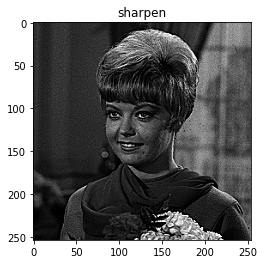

In [12]:
#image sharpen

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])



In [17]:

# Memanggil fungsi konvolusi yang telah dibuat sebelumnya dan menerapkan setiap filter yang telah ditentukan

convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[  0., -47., -42., ...,   0.,   0.,   0.],
       [-47., 145.,  75., ...,   0.,   0.,   0.],
       [-48., 105.,  47., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

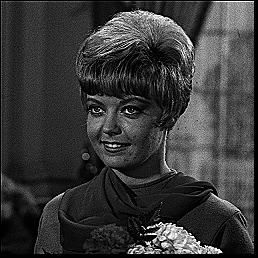

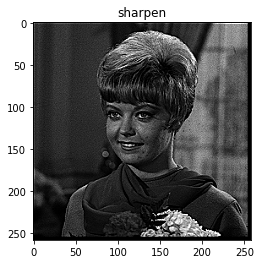

In [19]:

# Menampilkan hasil konvolusinya image sharpen
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

img_sharpen = img_gray.copy()
img_sharpen = convolution2d(img_sharpen, kernel_sharpen,1,2)

plt.title("sharpen")
plt.imshow(img_sharpen, cmap='gray',vmin=0, vmax=255)




**TUGAS NO 3**

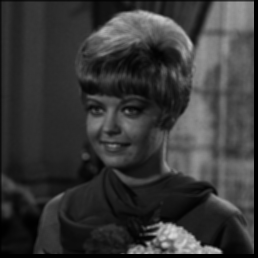

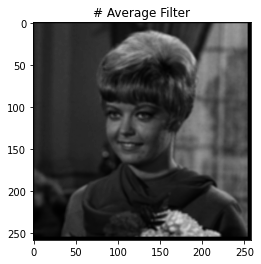

In [22]:
# Average Filter
average_filter = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]])/9

cv2_imshow(convolution2d(img_gray, average_filter, 1, 2))

img = img_gray.copy()
img  = convolution2d(img ,average_filter ,1,2)

plt.title("# Average Filter")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

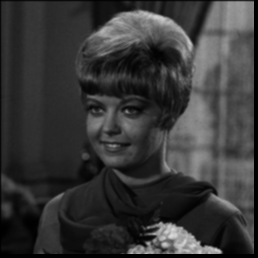

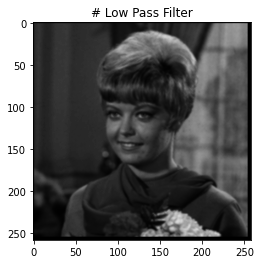

In [23]:
# Low Pass Filter
low_pass = np.array([[1,1,1],
                    [1,4,1],
                    [1,1,1]])/12

cv2_imshow(convolution2d(img_gray, low_pass, 1, 2))

img = img_gray.copy()
img  = convolution2d(img ,low_pass ,1,2)

plt.title("# Low Pass Filter")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

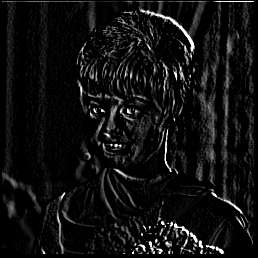

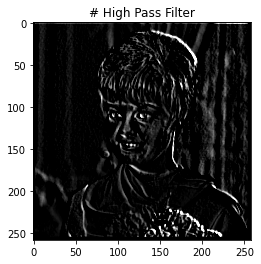

In [24]:
# High Pass Filter
high_pass = np.array([[-1,0,1],
                      [-1,0,3],
                      [-3,0,1]])

cv2_imshow(convolution2d(img_gray, high_pass, 1, 2))

img = img_gray.copy()
img  = convolution2d(img ,high_pass ,1,2)

plt.title("# High Pass Filter")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

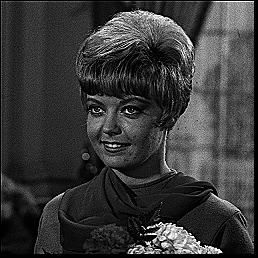

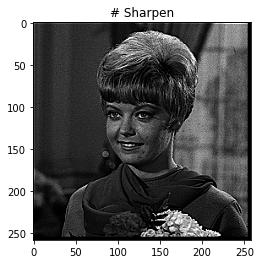

In [25]:
# Sharpen
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))

img = img_gray.copy()
img  = convolution2d(img ,sharpen ,1,2)

plt.title("# Sharpen")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

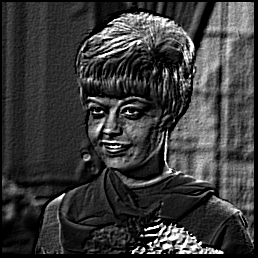

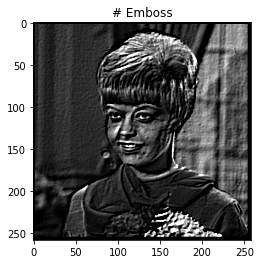

In [27]:
# Emboss
emboss = np.array([[-2,-1,0],
                    [-1,1,1],
                    [0,1,2]])

cv2_imshow(convolution2d(img_gray, emboss, 1, 2))
#menampilkan plote 
img = img_gray.copy()
img  = convolution2d(img ,emboss ,1,2)

plt.title("# Emboss")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)


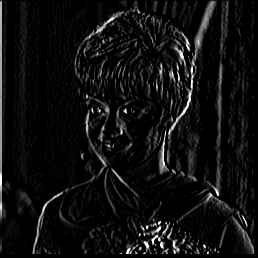

In [16]:
# Left Sobel Edge Detection
lsed = np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]])

cv2_imshow(convolution2d(img_gray, lsed, 1, 2))

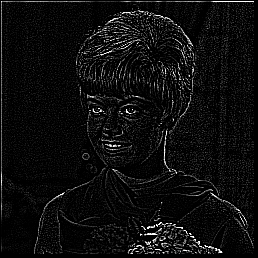

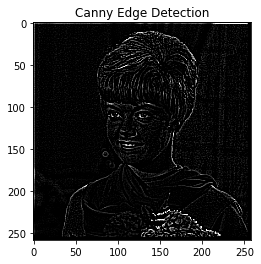

In [33]:
# Canny Edge Detection
ced = np.array([[-1,-1,-1],
                [-1,8,-1],
                [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, ced, 1, 2))

img = img_gray.copy()
img  = convolution2d(img , ced,1,2)

plt.title("Canny Edge Detection")
plt.imshow(img , cmap='gray',vmin=0, vmax=255)

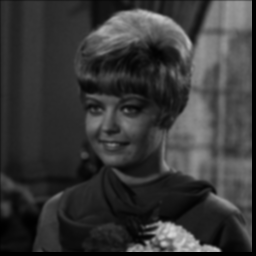

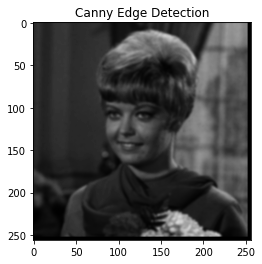

In [38]:
# 5x5 Gaussian Blur
gaussian_blur = np.array ([[1,4,6,4,1],
                [4,16,24,16,4],
                [6,24,36,24,6],
                [4,16,24,16,4],
                [1,4,6,4,1]]) *1/256

cv2_imshow(convolution2d(img_gray, gaussian_blur, 1, 2))

img = img_gray.copy()
img  = convolution2d(img , gaussian_blur,1,2)

plt.title("Canny Edge Detection")
plt.imshow(img , cmap='gray',vmin=0, vmax=255)

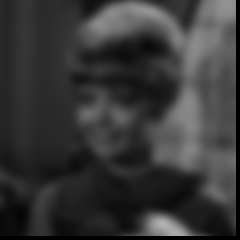

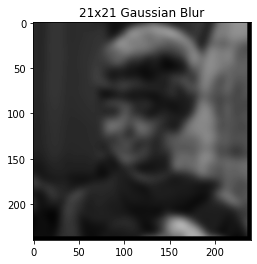

In [29]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))

img = img_gray.copy()
img = convolution2d(img, gauss_kernel ,1,2)

plt.title("21x21 Gaussian Blur")
plt.imshow(img, cmap='gray',vmin=0, vmax=255)